# Problem Statement 2:
Chandrashekhar wants to purchase office-space. He does a detailed survey of the offices and corporate complexes in the area, and tries to quantify a lot of factors, such as the distance of the offices from residential and other commercial areas, schools and workplaces; the reputation of the construction companies and builders involved in constructing the apartments; the distance of the offices from highways, freeways and important roads; the facilities around the office space and so on.
Each of these factors are quantified, normalized and mapped to values on a scale of 0 to 1. Chandrashekhar then makes a table. Each row in the table corresponds to Chandrashekhar Observations for a particular house. If Chandrashekhar has observed and noted F features, the row contains F values separated by a single space, followed by the office-space price in dollars/square-foot. If Chandrashekhar makes observations for H houses, his observation table has (F+1) columns and H rows, and a total of (F+1) * H entries.
Chandrashekhar does several such surveys and provides you with the tabulated data. At the end of these tables are some rows which have just F columns (the price per square foot is missing). Your task is to predict these prices. F can be any integer number between 1 and 5, both inclusive.
There is one important observation which Chandrashekhar has made.
The prices per square foot, are (approximately) a polynomial function of the features in the observation table. This polynomial always has an order less than 4
Input Format
The first line contains two space separated integers, F and N. Over here, F is the number of observed features. N is the number of rows for which features as well as price per square-foot have been noted.
This is followed by a table having F+1 columns and N rows with each row in a new line and each column separated by a single space. The last column is the price per square foot.
The table is immediately followed by integer T followed by T rows containing F columns.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_excel('data_final.xlsx')

In [3]:
dataset

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
...,...,...,...
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [5]:
dataset.describe()

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [6]:
dataset.shape

(100, 3)

In [7]:
dataset.nunique()

observation     65
feature         61
price          100
dtype: int64

In [8]:
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
x=x.reshape(-1,1)

In [9]:
x

array([[0.68],
       [0.23],
       [0.29],
       [0.45],
       [0.83],
       [0.8 ],
       [0.92],
       [0.43],
       [0.89],
       [0.95],
       [0.06],
       [0.91],
       [0.69],
       [0.94],
       [0.06],
       [0.17],
       [0.66],
       [0.43],
       [0.64],
       [0.44],
       [0.93],
       [0.43],
       [0.85],
       [0.07],
       [0.52],
       [0.15],
       [0.13],
       [0.6 ],
       [0.4 ],
       [0.65],
       [0.17],
       [0.97],
       [0.04],
       [0.53],
       [0.85],
       [0.69],
       [0.22],
       [0.15],
       [0.02],
       [0.91],
       [0.76],
       [0.19],
       [0.62],
       [0.17],
       [0.69],
       [0.76],
       [0.23],
       [0.96],
       [0.03],
       [0.23],
       [0.11],
       [0.87],
       [0.97],
       [0.25],
       [0.58],
       [0.42],
       [0.24],
       [0.62],
       [0.15],
       [0.95],
       [0.64],
       [0.64],
       [0.4 ],
       [0.12],
       [0.22],
       [0.4 ],
       [0.

In [10]:
y

array([ 511.14,  717.1 ,  607.91,  270.4 ,  289.88,  830.85, 1038.09,
        455.19,  640.17,  511.06,  177.03, 1242.52,  891.37, 1339.72,
        169.88,  276.05,  517.43,  522.25,  932.21,  851.25,  640.11,
        308.68, 1046.05,  332.4 ,  171.85,  109.55,  361.97,  872.21,
        303.7 ,  256.38,  341.2 , 1194.63,  408.6 ,  895.54,  518.25,
        638.75,  301.9 ,  163.38,  240.77, 1449.05,  609.  ,  174.59,
        593.45,  355.96,  671.46, 1193.7 ,  278.88,  411.4 ,   42.08,
        166.19,   58.62,  642.45,  368.14,  702.78,  615.74,  143.79,
        109.  ,  328.28,  205.16, 1360.49,  905.83,  487.33,  202.76,
        202.01,  148.87,  745.3 ,  503.04, 1563.82,  165.21,  438.4 ,
         98.47,  819.63,  174.44,  483.13,  534.24,  572.31,  957.61,
        518.29, 1143.49, 1211.31,  784.74,  283.7 ,  684.38,  719.46,
        292.23,  775.68,  130.77,  801.6 ,  323.55,  726.9 ,  661.12,
        771.11, 1016.14,  237.69,  325.89,  636.22,  272.12,  696.65,
        434.53,  593

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
p=PolynomialFeatures(degree=4)
x_poly=p.fit_transform(x)

In [13]:
x_poly

array([[1.0000000e+00, 6.8000000e-01, 4.6240000e-01, 3.1443200e-01,
        2.1381376e-01],
       [1.0000000e+00, 2.3000000e-01, 5.2900000e-02, 1.2167000e-02,
        2.7984100e-03],
       [1.0000000e+00, 2.9000000e-01, 8.4100000e-02, 2.4389000e-02,
        7.0728100e-03],
       [1.0000000e+00, 4.5000000e-01, 2.0250000e-01, 9.1125000e-02,
        4.1006250e-02],
       [1.0000000e+00, 8.3000000e-01, 6.8890000e-01, 5.7178700e-01,
        4.7458321e-01],
       [1.0000000e+00, 8.0000000e-01, 6.4000000e-01, 5.1200000e-01,
        4.0960000e-01],
       [1.0000000e+00, 9.2000000e-01, 8.4640000e-01, 7.7868800e-01,
        7.1639296e-01],
       [1.0000000e+00, 4.3000000e-01, 1.8490000e-01, 7.9507000e-02,
        3.4188010e-02],
       [1.0000000e+00, 8.9000000e-01, 7.9210000e-01, 7.0496900e-01,
        6.2742241e-01],
       [1.0000000e+00, 9.5000000e-01, 9.0250000e-01, 8.5737500e-01,
        8.1450625e-01],
       [1.0000000e+00, 6.0000000e-02, 3.6000000e-03, 2.1600000e-04,
        1.29

In [14]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(x,y)

LinearRegression()

In [15]:
from sklearn.linear_model import LinearRegression
lr2=LinearRegression()
lr2.fit(x_poly,y)

LinearRegression()

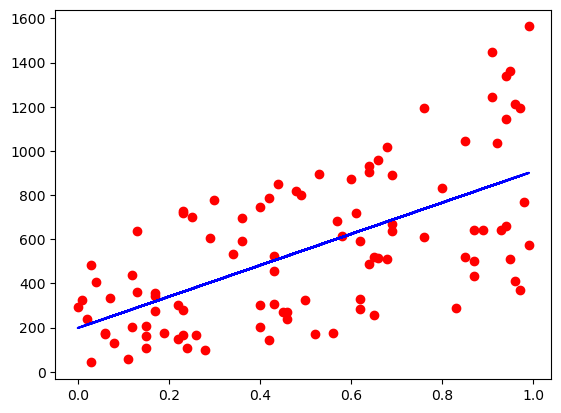

In [16]:
plt.scatter(x,y,color='red')
plt.plot(x,lr1.predict(x),color='blue')

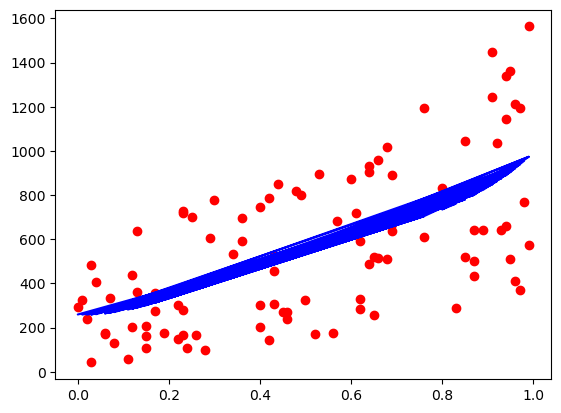

In [17]:
plt.scatter(x,y,color='red')
plt.plot(x,lr2.predict(x_poly),color='blue')